<h2>Final Project AI</h2>

<b>Sentiment Analyst -DATA TWITTER <br> 
search data by data crawl/scrapp 
### Maulana Ilyasa Shafrizaliansyah - 5027211065

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt         
import seaborn as sns
import re

from wordcloud import WordCloud
from collections import Counter, OrderedDict

### Data Info

In [2]:
data = pd.read_csv('./re_dataset.csv',encoding='ISO-8859-1')
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [3]:
data.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


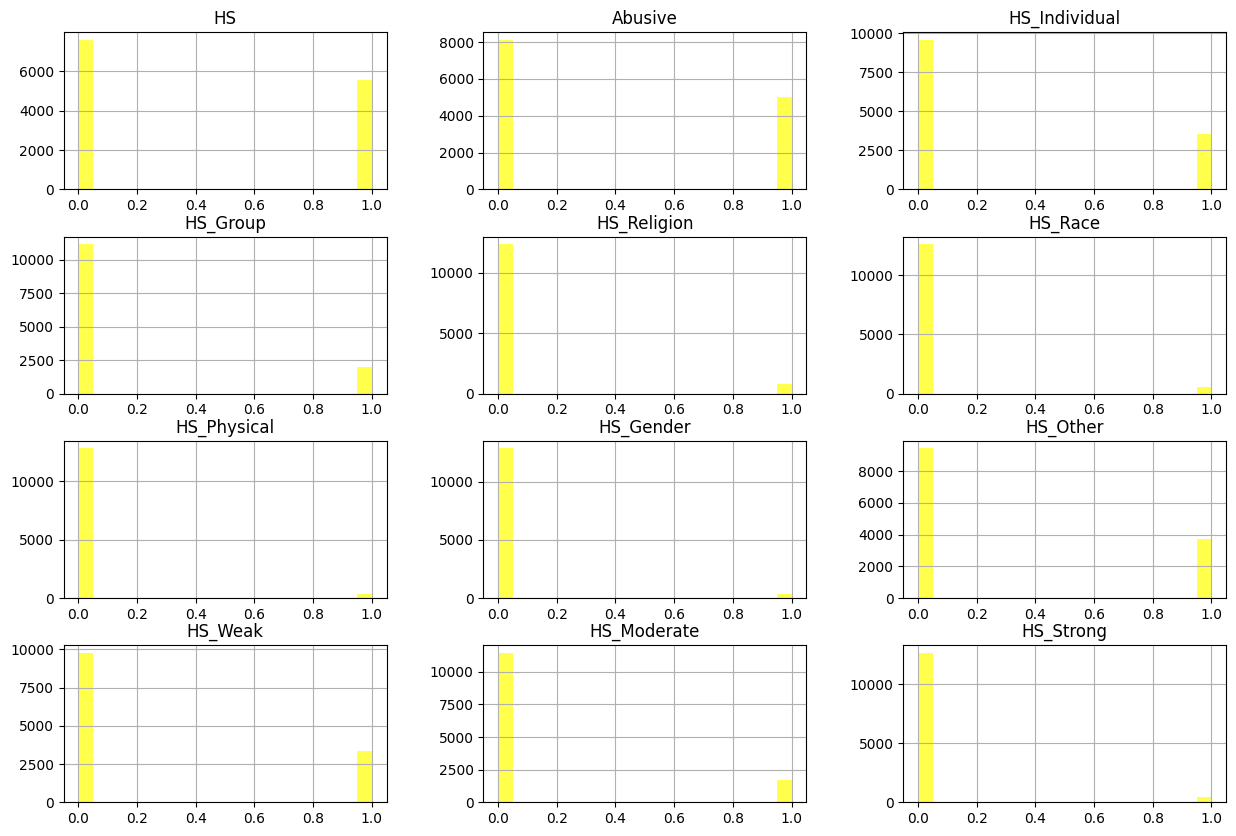

In [36]:
data.hist(bins=20, figsize=(15, 10), color='yellow', alpha=0.7)
plt.show()

C:\Users\N1NRK\AppData\Local\Temp\ipykernel_41328\2782068541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


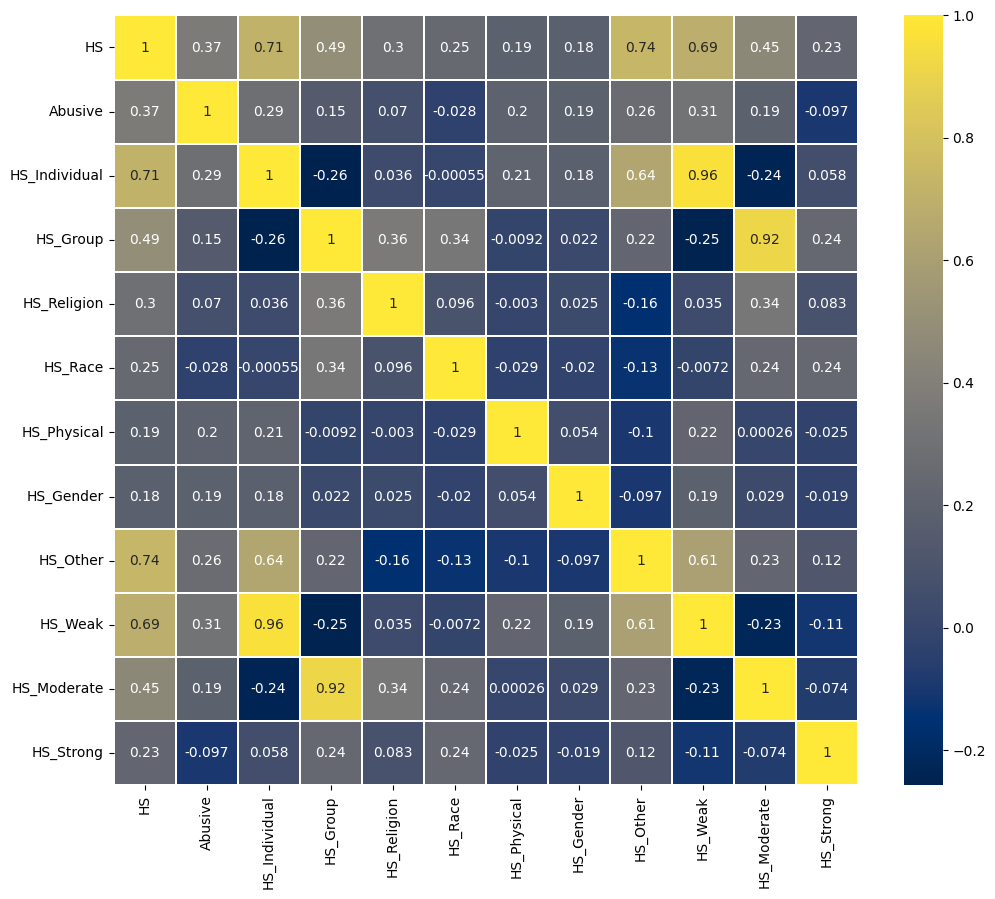

In [33]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', linewidths=.10)
plt.show()

In [7]:
data.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

# Preprocessing Data

In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

nltk_stw_id = stopwords.words('indonesian')
print(nltk_stw_id)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\N1NRK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\N1NRK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [10]:
def preprocess(textdata, stopwords_id, emojis):
    processedText = []

    wordLemm = WordNetLemmatizer()

    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        tweet = re.sub(urlPattern, ' ', tweet)
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "" + emojis[emoji])
        tweet = re.sub(userPattern, '', tweet)
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(r'user+', '', tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if word not in stopwords_id:
                if len(word) > 1:
                    word = wordLemm.lemmatize(word)
                    tweetwords += (word + ' ')

        processedText.append(tweetwords)

    return processedText

In [11]:
data['processed_text'] = preprocess(data['Tweet'], nltk_stw_id, emojis)
print(data[['Tweet', 'processed_text']].head(10))

                                               Tweet  \
0  - disaat semua cowok berusaha melacak perhatia...   
1  RT USER: USER siapa yang telat ngasih tau elu?...   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   
4  USER USER Kaum cebong kapir udah keliatan dong...   
5  USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...   
6  deklarasi pilkada 2018 aman dan anti hoax warg...   
7  Gue baru aja kelar re-watch Aldnoah Zero!!! pa...   
8  Nah admin belanja satu lagi port terbaik nak m...   
9                      USER Enak lg klo smbil ngewe'   

                                      processed_text  
0  disaat cowok berusaha melacak perhatian gue lo...  
1  rt telat ngasih tau elu edan sarap gue bergaul...  
2  41 kadang berfikir percaya tuhan jatuh berkali...  
3                       nku tau matamu sipit diliat   
4  kaum cebong kapir udah keliatan dongoknya dong...  
5  ya ban taplak dkk xf0 x9f x98 x84 xf0 x9f x98 ... 

## EDA

In [12]:
alay = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay.head()

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [13]:
abusive = pd.read_csv('abusive.csv')['ABUSIVE'].tolist()

In [14]:
tweets_corpus = [] 

for tweet in data['processed_text'].str.split():
    for word in tweet:
        if len(word) > 0 and word in abusive:
            tweets_corpus.append(word)


In [15]:
counter_tweets = Counter(tweets_corpus).most_common()[:1000]

C:\Users\N1NRK\AppData\Local\Temp\ipykernel_41328\1775819210.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals[:show_only], y=combined_words[:show_only], palette=colors)


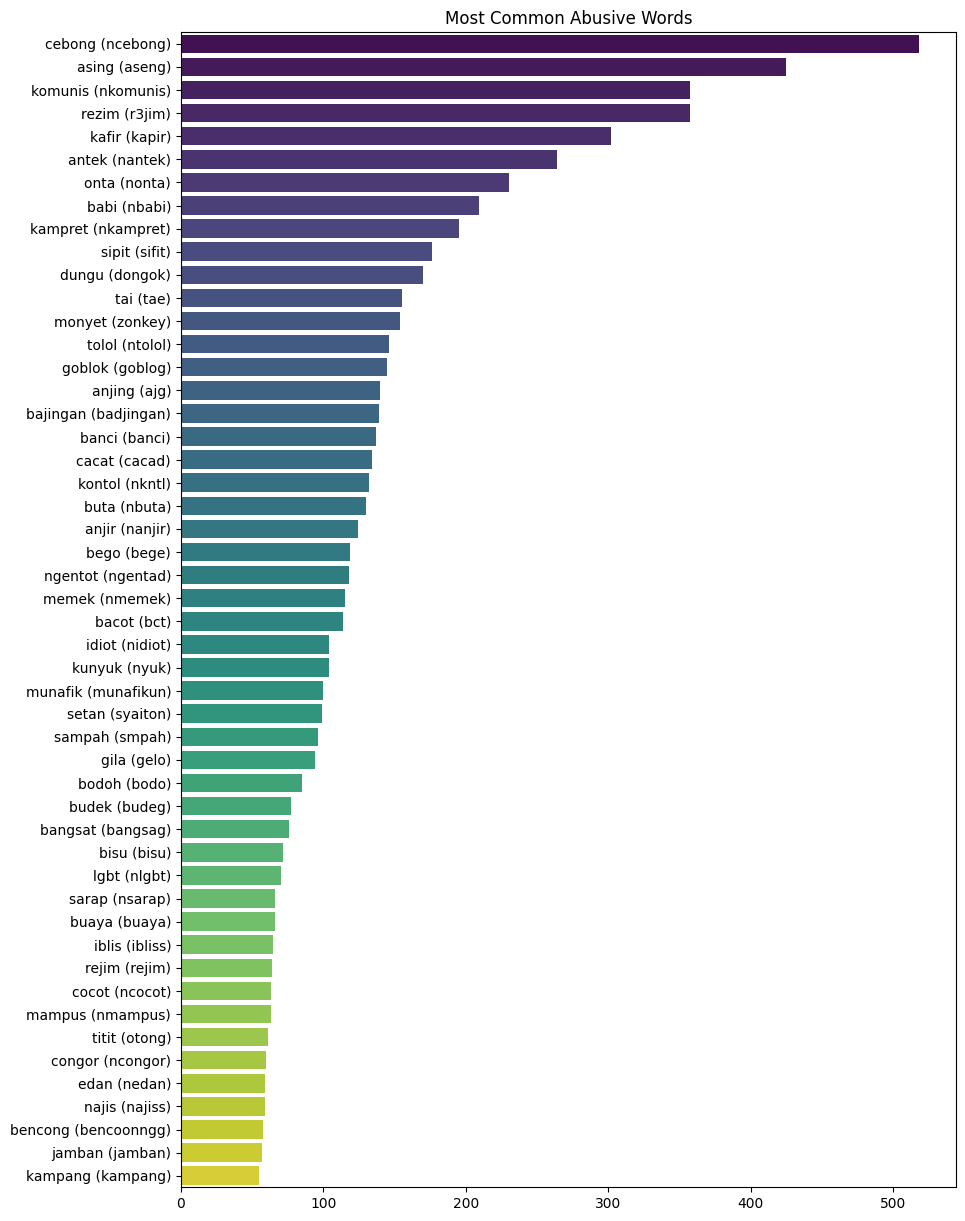

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

# Assuming you already have the data prepared
top_tweets = OrderedDict(counter_tweets)

show_only = 50

keys = list(top_tweets.keys())
vals = [top_tweets[k] for k in keys]

original_slang = []
for word in keys:
    if word in alay[1].values:
        original_slang.append(alay.loc[alay[1] == word, 0].values[0])
    else:
        original_slang.append(word)

combined_words = [f'{keys[i]} ({original_slang[i]})' for i in range(len(keys))]


colormap = 'viridis'


colors = sns.color_palette(colormap, n_colors=show_only)

plt.figure(figsize=(10, 15))
sns.barplot(x=vals[:show_only], y=combined_words[:show_only], palette=colors)
plt.title('Most Common Abusive Words')
plt.show()


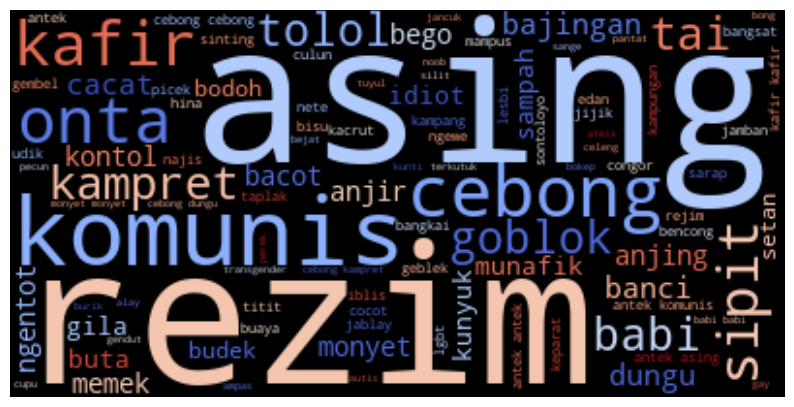

In [17]:
fig, axes = plt.subplots(ncols=1, figsize=(10, 8))
tokens_ = ' '.join(tweets_corpus)
wc_ = WordCloud(max_words=100, background_color='black', max_font_size=100, colormap='coolwarm').generate(tokens_)
axes.axis("off")
axes.imshow(wc_, interpolation="bilinear")
plt.show()

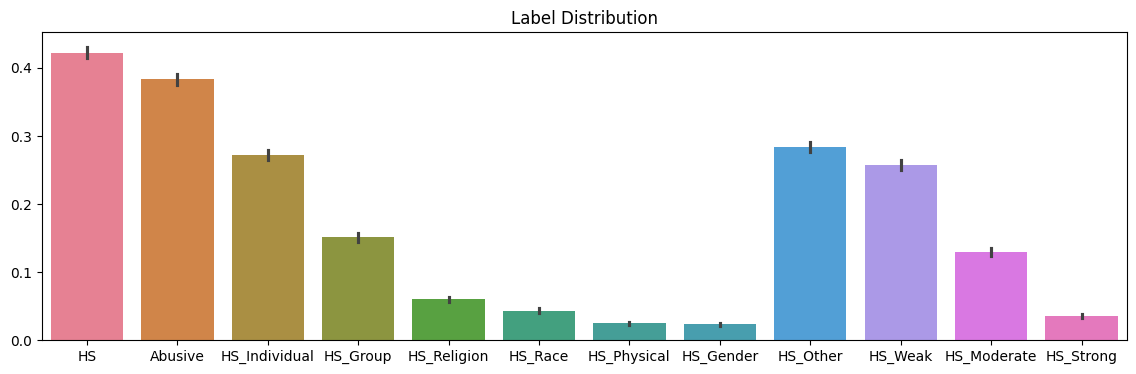

In [18]:
plt.figure(figsize=(14,4))
plt.title('Label Distribution')
sns.barplot(data)
plt.show()

## Model Build Preparation

In [19]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [20]:
labels = data[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
               'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']]

processed_text = data["processed_text"]

X_train, X_test, y_train, y_test = train_test_split(processed_text, labels,
                                                    test_size=0.05, random_state=0)
print(f'Data Split done.')

Data Split done.


In [21]:
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')


Vectoriser fitted.


In [22]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)
print(f'Data Transformed.')


Data Transformed.


## Model Evaluation
menggunakan algoritma Logistic Regression 

In [23]:
multi_output_classifier = MultiOutputClassifier(LogisticRegression(C=2, max_iter=1000, n_jobs=-1))

# Fit the multi-output classifier
multi_output_classifier.fit(X_train, y_train)


MultiOutputClassifier(estimator=LogisticRegression(C=2, max_iter=1000,
                                                   n_jobs=-1))

In [24]:
def model_Evaluate(model, vectoriser, X_test, y_test, labels):
    y_pred = model.predict(X_test)

    # Use multilabel_confusion_matrix for multi-label classification
    mcm = multilabel_confusion_matrix(y_test.values, y_pred)

    # Print classification report for each label
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=labels.columns))

    return y_pred

In [25]:
y_pred = model_Evaluate(multi_output_classifier, vectoriser, X_test, y_test, labels)

Classification Report:
               precision    recall  f1-score   support

           HS       0.78      0.85      0.81       247
      Abusive       0.87      0.84      0.86       210
HS_Individual       0.66      0.59      0.62       149
     HS_Group       0.85      0.40      0.54        98
  HS_Religion       0.81      0.47      0.59        45
      HS_Race       0.86      0.56      0.68        34
  HS_Physical       0.50      0.10      0.17        10
    HS_Gender       0.00      0.00      0.00        15
     HS_Other       0.76      0.67      0.71       151
      HS_Weak       0.61      0.53      0.57       141
  HS_Moderate       0.83      0.28      0.42        86
    HS_Strong       0.65      0.55      0.59        20

    micro avg       0.76      0.63      0.69      1206
    macro avg       0.68      0.49      0.55      1206
 weighted avg       0.76      0.63      0.67      1206
  samples avg       0.42      0.35      0.36      1206



C:\Users\N1NRK\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\N1NRK\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
with open('multi_output_classifier.pkl', 'wb') as model_file:
    pickle.dump((vectoriser, multi_output_classifier), model_file)

print("Models saved successfully.")


Models saved successfully.


In [27]:
def predict(vectoriser, model, text):
    textdata = vectoriser.transform(text)
    predictions = model.predict(textdata)

    data = []
    for i, txt in enumerate(text):
        data.append((txt, *predictions[i]))

    columns = ['text'] + list(labels.columns)
    df = pd.DataFrame(data, columns=columns)
    return df

In [28]:
with open('multi_output_classifier.pkl', 'rb') as model_file:
    vectoriser, multi_output_classifier = pickle.load(model_file)

## Predict

In [29]:
text_to_predict = ["dimas cina komunis bodoh goblok lagi"]

In [30]:
prediction_df = predict(vectoriser, multi_output_classifier, text_to_predict)
print(prediction_df.head())

                                   text  HS  Abusive  HS_Individual  HS_Group  \
0  dimas cina komunis bodoh goblok lagi   1        1              0         1   

   HS_Religion  HS_Race  HS_Physical  HS_Gender  HS_Other  HS_Weak  \
0            0        1            0          0         0        0   

   HS_Moderate  HS_Strong  
0            0          0  
